In [142]:
import pandas as pd
import statistics as st
import tensorflow as tf
from keras.models import Sequential
from keras.models import load_model
from keras.optimizers import RMSprop,Adam
from keras.layers import Dense,Flatten,Dropout,Activation
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('archive/newDataset.csv')
dataset.head()

,q1,q2,q3,q4,q5,q6,x,y,z
0,0.531240,-0.309220,0.46022,-0.000805,0.130020,0.0,0.2553,0.1500,0.551
1,-0.200530,0.480510,-0.14141,-0.001043,-0.057845,0.0,0.4920,-0.1000,0.475
2,0.696370,-0.060094,0.49841,0.000969,0.129490,0.0,0.2667,0.2230,0.456
3,-0.064687,0.435570,-0.45136,-0.001830,-0.129870,0.0,0.4850,-0.0314,0.620
4,-0.661740,-0.012239,0.31486,-0.000736,0.078707,0.0,0.2940,-0.2290,0.510


In [44]:
coords = dataset[['x', 'y', 'z']]
coords

,x,y,z
0,0.2553,0.15000,0.551
1,0.4920,-0.10000,0.475
2,0.2667,0.22300,0.456
3,0.4850,-0.03140,0.620
4,0.2940,-0.22900,0.510
...,...,...,...
14995,0.2370,-0.12800,0.507
14996,0.4133,-0.03160,0.700
14997,0.4810,-0.16000,0.612
14998,0.4329,-0.01600,0.691


In [45]:
thetas = dataset[['q1', 'q2', 'q3','q4','q5','q6']]
thetas

,q1,q2,q3,q4,q5,q6
0,0.531240,-0.309220,0.46022,-0.000805,0.130020,0.0
1,-0.200530,0.480510,-0.14141,-0.001043,-0.057845,0.0
2,0.696370,-0.060094,0.49841,0.000969,0.129490,0.0
3,-0.064687,0.435570,-0.45136,-0.001830,-0.129870,0.0
4,-0.661740,-0.012239,0.31486,-0.000736,0.078707,0.0
...,...,...,...,...,...,...
14995,-0.495410,-0.405220,0.63910,0.004220,0.184300,0.0
14996,-0.076337,0.233490,-0.42374,-0.001417,-0.112710,0.0
14997,-0.321160,0.525500,-0.54525,-0.001725,-0.154460,0.0
14998,-0.036980,0.297850,-0.47265,-0.001736,-0.127480,0.0


In [47]:
d1 = coords.shape   # XYZ Coordinates
d2 = thetas.shape   # Theta values

In [69]:
d1[1]

3

In [84]:
XYZ_train_val, XYZ_test, thetas_train_val, thetas_test = train_test_split(coords, thetas, test_size=0.2, random_state=42)

# Step 2: Split the train + validation set into the training set and validation set
# The validation set will be 25% of the remaining 80% data
XYZ_train, XYZ_val, thetas_train, thetas_val = train_test_split(XYZ_train_val, thetas_train_val, test_size=0.25, random_state=42)

print(f"XYZ Training set size: {len(XYZ_train)}")
print(f"XYZ Validation set size: {len(XYZ_val)}")
print(f"XYZ Test set size: {len(XYZ_test)}")

print('\n')
print(f"thetas Training set size: {len(thetas_train)}")
print(f"thetas Validation set size: {len(thetas_val)}")
print(f"thetas Test set size: {len(thetas_test)}")

XYZ Training set size: 9000
XYZ Validation set size: 3000
XYZ Test set size: 3000


thetas Training set size: 9000
thetas Validation set size: 3000
thetas Test set size: 3000


In [128]:
model = Sequential()
model.add(Dense(64,input_shape=([d1[1]]),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6))
model.compile(loss='mean_squared_error', optimizer=RMSprop(lr=0.0001, rho=0.9, epsilon=1e-06),metrics=['mae'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 64)                256       
                                                                 
 dense_68 (Dense)            (None, 64)                4160      
                                                                 
 dense_69 (Dense)            (None, 64)                4160      
                                                                 
 dense_70 (Dense)            (None, 64)                4160      
                                                                 
 dense_71 (Dense)            (None, 6)                 390       
                                                                 
Total params: 13126 (51.27 KB)
Trainable params: 13126 (51.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [143]:
history = model.fit(XYZ_train, thetas_train, epochs=500)

Epoch 1/500
282/282 [==============================] - 0s 825us/step - loss: 0.0133 - mae: 0.0157
Epoch 2/500
282/282 [==============================] - 0s 798us/step - loss: 0.0135 - mae: 0.0154
Epoch 3/500
282/282 [==============================] - 0s 779us/step - loss: 0.0128 - mae: 0.0148
Epoch 4/500
282/282 [==============================] - 0s 827us/step - loss: 0.0126 - mae: 0.0153
Epoch 5/500
282/282 [==============================] - 0s 823us/step - loss: 0.0127 - mae: 0.0154
Epoch 6/500
282/282 [==============================] - 0s 795us/step - loss: 0.0126 - mae: 0.0157
Epoch 7/500
282/282 [==============================] - 0s 807us/step - loss: 0.0121 - mae: 0.0156
Epoch 8/500
282/282 [==============================] - 0s 851us/step - loss: 0.0130 - mae: 0.0153
Epoch 9/500
282/282 [==============================] - 0s 1ms/step - loss: 0.0133 - mae: 0.0150
Epoch 10/500
282/282 [==============================] - 0s 786us/step - loss: 0.0130 - mae: 0.0153
Epoch 11/500
282/282 

{'loss': [0.01332483533769846,
  0.013527803122997284,
  0.01278499886393547,
  0.012591446749866009,
  0.012655540369451046,
  0.012611186131834984,
  0.012111064977943897,
  0.012968759052455425,
  0.01325212325900793,
  0.012952866964042187,
  0.012746022082865238,
  0.01142144575715065,
  0.012742208316922188,
  0.012141145765781403,
  0.011801267974078655,
  0.013277396559715271,
  0.011301002465188503,
  0.013278191909193993,
  0.012068545445799828,
  0.012913722544908524,
  0.013035920448601246,
  0.012211370281875134,
  0.012229828163981438,
  0.012204106897115707,
  0.01258834544569254,
  0.01309087686240673,
  0.012369656935334206,
  0.012386458925902843,
  0.010834158398211002,
  0.013733274303376675,
  0.012430155649781227,
  0.01159194577485323,
  0.0122387008741498,
  0.012567730620503426,
  0.01332509983330965,
  0.01236532349139452,
  0.012875487096607685,
  0.01265626959502697,
  0.012021408416330814,
  0.013481548056006432,
  0.012475799769163132,
  0.0128833418712019

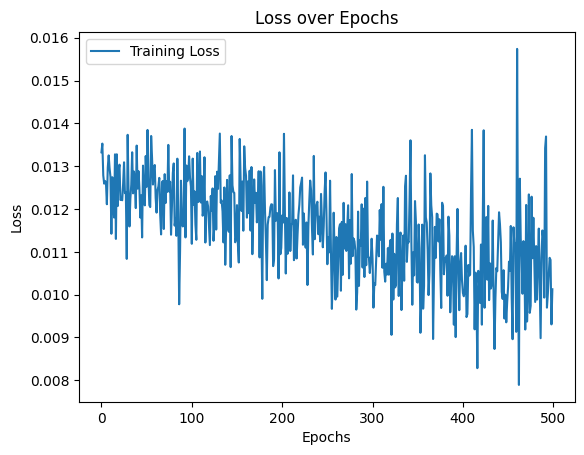

In [148]:
plt.plot(history.epoch,history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [153]:
x,y,z = XYZ_val.iloc[10]
input_sample = np.array([[x,y,z]])
print(input_sample)
print(input_sample.shape)

[[ 0.2583 -0.0764  0.608 ]]
(1, 3)


In [154]:
model.predict(input_sample)

1/1 [==============================] - 0s 13ms/step


array([[-0.29983205, -0.39576897,  0.38292384,  0.00329983,  0.1237199 ,
        -0.01486687]], dtype=float32)

In [159]:
model.save(filepath='models/model1.h5');

In [160]:
thetas_val_pred = model.predict(XYZ_val)
print('done')
val_accuracy = accuracy_score(thetas_val,thetas_val_pred)
print(f"Validation Accuracy after Hyperparameter Tuning: {val_accuracy:.2f}")

thetas_test_pred = model.predict(XYZ_test)
test_accuracy = accuracy_score(thetas_test, thetas_test_pred)
print(f"Test Accuracy after Hyperparameter Tuning: {test_accuracy:.2f}")

94/94 [==============================] - 0s 573us/step
done


ValueError: continuous-multioutput is not supported